<a href="https://colab.research.google.com/github/KarelGans/American-House-Prediction-Model-Using-Regression-Based-on-XGBoost-Algorithm/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# American House Price Prediction
The following notebook is used to predict American Houses Price based on different features from the American Housing Dataset to assist real estate related problems.

Created by Carolus Christadi Cahyono

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Data Upload

In [3]:
# Load to Dataframe
df = pd.read_csv('American_Housing_Data.csv', encoding='utf-8')
df.head()

,Zip Code,Price,Beds,Baths,Living Space,Address,City,State,Zip Code Population,Zip Code Density,County,Median Household Income,Latitude,Longitude
0,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
1,10013,3999000.0,2,3,1967,74 GRAND ST APT 3,New York,New York,29563,20967.9,New York,370046.0,40.72001,-74.00472
2,10014,1650000.0,1,1,718,140 CHARLES ST APT 4D,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
3,10014,760000.0,3,2,1538,38 JONES ST,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601
4,10014,1100000.0,1,1,600,81 BEDFORD ST APT 3F,New York,New York,29815,23740.9,New York,249880.0,40.73407,-74.00601


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29376 entries, 0 to 29375
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Zip Code                 29376 non-null  int64  
 1   Price                    29376 non-null  float64
 2   Beds                     29376 non-null  int64  
 3   Baths                    29376 non-null  int64  
 4   Living Space             29376 non-null  int64  
 5   Address                  29376 non-null  object 
 6   City                     29376 non-null  object 
 7   State                    29376 non-null  object 
 8   Zip Code Population      29376 non-null  int64  
 9   Zip Code Density         29376 non-null  float64
 10  County                   29376 non-null  object 
 11  Median Household Income  29374 non-null  float64
 12  Latitude                 29376 non-null  float64
 13  Longitude                29376 non-null  float64
dtypes: float64(5), int64(5

In [5]:
df.describe

<bound method NDFrame.describe of        Zip Code      Price  Beds  Baths  Living Space  \
0         10013  3999000.0     2      3          1967   
1         10013  3999000.0     2      3          1967   
2         10014  1650000.0     1      1           718   
3         10014   760000.0     3      2          1538   
4         10014  1100000.0     1      1           600   
...         ...        ...   ...    ...           ...   
29371     85215   525000.0     3      3          2701   
29372     85215   194500.0     1      1           651   
29373     85215   215000.0     2      2          1200   
29374     85215   335000.0     2      2          1440   
29375     85215   771200.0     4      3          2279   

                            Address      City     State  Zip Code Population  \
0                 74 GRAND ST APT 3  New York  New York                29563   
1                 74 GRAND ST APT 3  New York  New York                29563   
2             140 CHARLES ST APT 4D  New York  New York                29815   
3                       38 JONES ST  New York  New York                29815   
4              81 BEDFORD ST APT 3F  New York  New York                29815   
...                             ...       ...       ...                  ...   
29371   6202 E MCKELLIPS RD UNIT 17      Mesa   Arizona                16013   
29372  5518 E LINDSTROM LN UNIT 11A      Mesa   Arizona                16013   
29373             5831 E LEONORA ST      Mesa   Arizona                16013   
29374            2312 N NICKLAUS DR      Mesa   Arizona                16013   
29375         3909 N SHANNON CIRCLE      Mesa   Arizona                16013   

       Zip Code Density    County  Median Household Income  Latitude  \
0               20967.9  New York                 370046.0  40.72001   
1               20967.9  New York                 370046.0  40.72001   
2               23740.9  New York                 249880.0  40.73407   
3               23740.9  New York                 249880.0  40.73407   
4               23740.9  New York                 249880.0  40.73407   
...                 ...       ...                      ...       ...   
29371              74.6  Maricopa                 109592.0  33.51101   
29372              74.6  Maricopa                 109592.0  33.51101   
29373              74.6  Maricopa                 109592.0  33.51101   
29374              74.6  Maricopa                 109592.0  33.51101   
29375              74.6  Maricopa                 109592.0  33.51101   

       Longitude  
0      -74.00472  
1      -74.00472  
2      -74.00601  
3      -74.00601  
4      -74.00601  
...          ...  
29371 -111.58027  
29372 -111.58027  
29373 -111.58027  
29374 -111.58027  
29375 -111.00000  

[29376 rows x 14 columns]>

## EDA

Finding correlations and patterns in features.

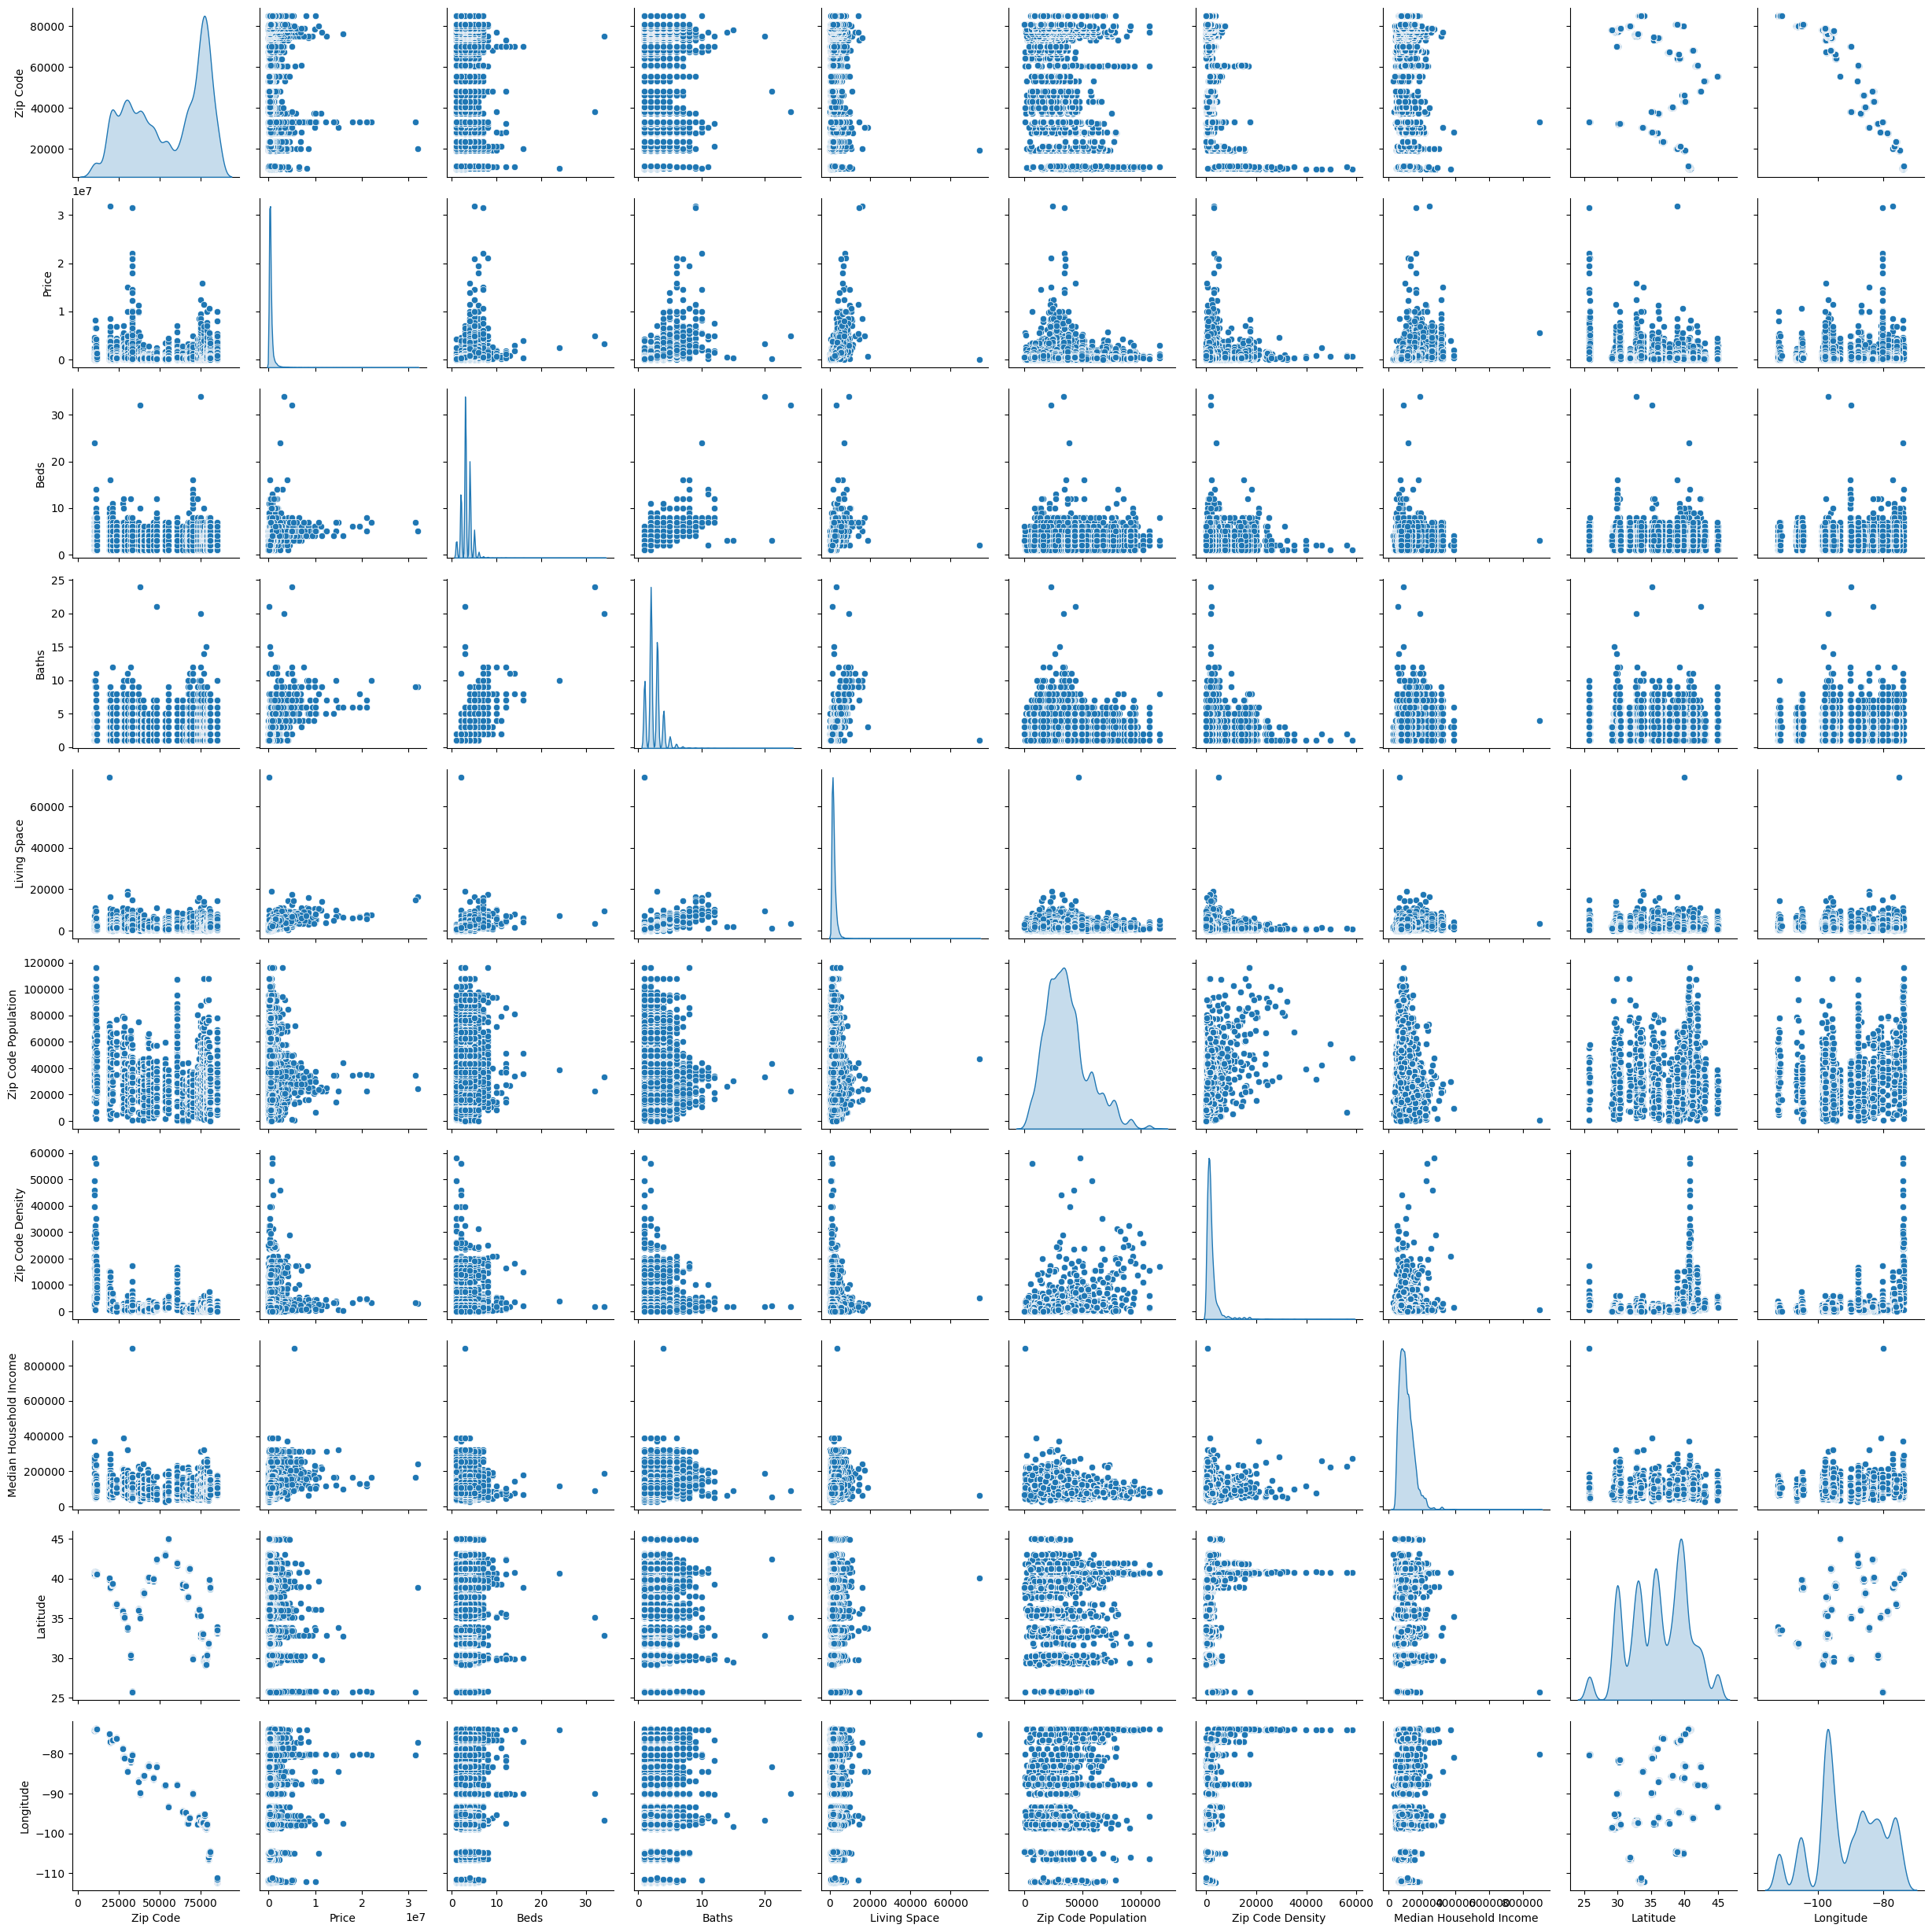

In [6]:
sns.pairplot(df, diag_kind = 'kde')

Finding correlations between price and other features to determine which features might be useful for the models.

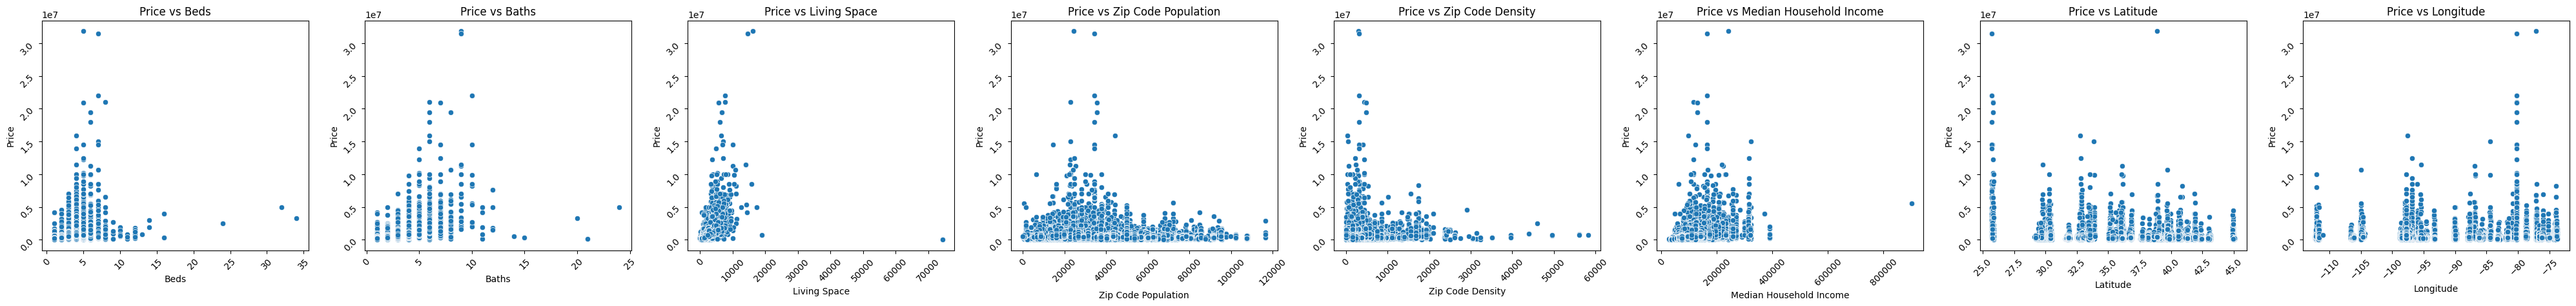

In [8]:
# Filter relevant numeric features
numeric_features = [
    'Beds', 'Baths', 'Living Space',
    'Zip Code Population', 'Zip Code Density',
    'Median Household Income'
    , 'Latitude', 'Longitude'
]

# Create subplots in one row
fig, axes = plt.subplots(1, len(numeric_features), figsize=(5 * len(numeric_features), 5))

for i, feature in enumerate(numeric_features):
    sns.scatterplot(data=df, x=feature, y='Price', ax=axes[i])
    axes[i].set_title(f'Price vs {feature}')
    axes[i].tick_params(labelrotation=45)

plt.tight_layout()
plt.show()


We can conclude that baths, beds, and living area has similar correlations to price. Therefore, we will only use one of the features, which will be living space.

I concluded that Longitude and Latitude has the most unique pattern when plot against price.

### Data Visualization

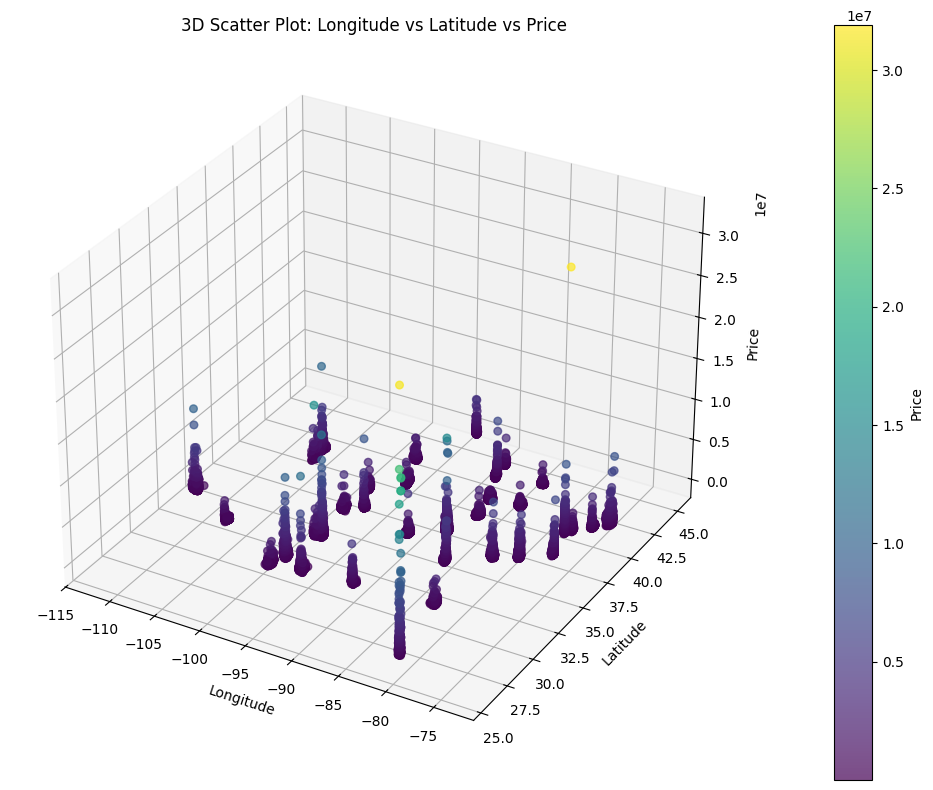

In [9]:
# Create a 3D figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the points
scatter = ax.scatter(
    df['Longitude'],
    df['Latitude'],
    df['Price'],
    c=df['Price'],
    cmap='viridis',
    s=30,
    alpha=0.7
)

# Set axis labels
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Price')

# Add color bar
cbar = plt.colorbar(scatter, pad=0.1)
cbar.set_label('Price')

plt.title('3D Scatter Plot: Longitude vs Latitude vs Price')
plt.tight_layout()
plt.show()


We have plotted and see that longitude and latitude is clustered on different places. We can also see that housing price in each clusters is different but we need another variable to know what might affects the different price in each cluster.

We will plot another graph but adding another variable which is living space for better visualization.

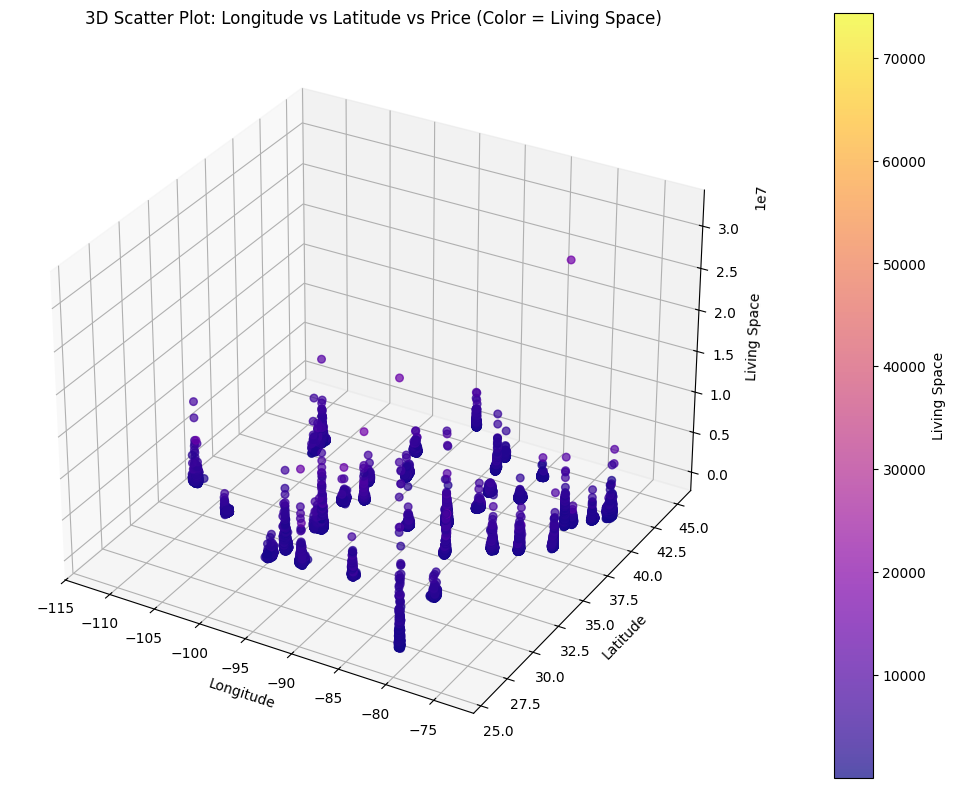

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the points (color = Beds, z = Price)
scatter = ax.scatter(
    df['Longitude'],
    df['Latitude'],
    df['Price'],        # height
    c=df['Living Space'],       # color
    cmap='plasma',      # try 'viridis', 'coolwarm', 'magma', etc.
    s=30,
    alpha=0.7
)

# Set axis labels
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Living Space')

# Add color bar
cbar = plt.colorbar(scatter, pad=0.1)
cbar.set_label('Living Space')

plt.title('3D Scatter Plot: Longitude vs Latitude vs Price (Color = Living Space)')
plt.tight_layout()
plt.show()


After plotting with a new feature, we can see that the high living space is not visible due to only a small portion in the dataset.

We may call it outlier so, we will need to clean the dataset first before plotting again.

## Data Cleaning (Preprocess)

### Dropping NaN values

In [17]:
df = df.dropna()

### Dropping outliers

In [18]:
Q1 = df['Living Space'].quantile(0.25)
Q3 = df['Living Space'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
cleaned_df = df[(df['Living Space'] >= lower_bound) & (df['Living Space'] <= upper_bound)]

In [19]:
cleaned_df['Price_Binned'] = pd.qcut(cleaned_df['Price'], q=5)


<ipython-input-19-fb4f75ef5f11>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['Price_Binned'] = pd.qcut(cleaned_df['Price'], q=5)


### Plotting after data cleaning

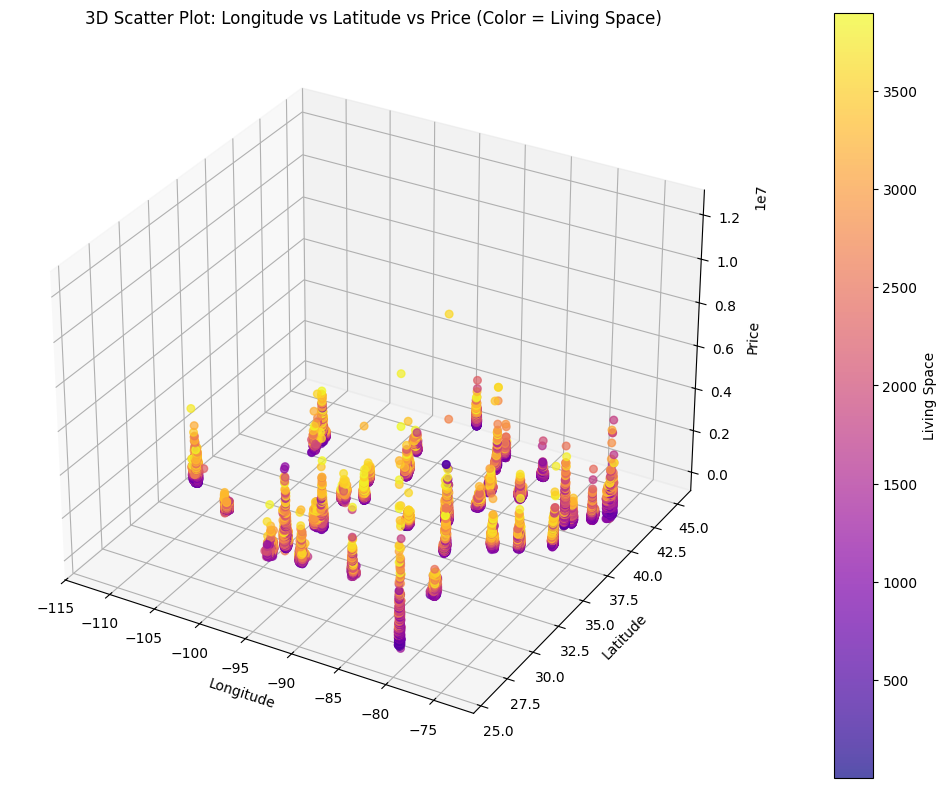

In [20]:
# Create a 3D figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the points (color = Beds, z = Price)
scatter = ax.scatter(
    cleaned_df['Longitude'],
    cleaned_df['Latitude'],
    cleaned_df['Price'],        # height
    c=cleaned_df['Living Space'],       # color
    cmap='plasma',
    s=30,
    alpha=0.7
)

# Set axis labels
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Price')

# Add color bar
cbar = plt.colorbar(scatter, pad=0.1)
cbar.set_label('Living Space')

plt.title('3D Scatter Plot: Longitude vs Latitude vs Price (Color = Living Space)')
plt.tight_layout()
plt.show()

Now, we can see the correlations betweeen latitude, longitude and living space against price. We can conclude that higher living space corelates to higher price.

## Creating a Model

### Create a model using linear regression

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

# Define features and target
X = cleaned_df[['Longitude', 'Latitude', 'Living Space']]
X = cleaned_df[numeric_features]
y = cleaned_df['Price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Generate predictions on the training and testing data
y_pred_train = model.predict(X_train)  # Predict on the training data
y_pred_test = model.predict(X_test)   # Predict on the testing data

mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
print(f"Train MAPE: {mape_train:.4f} ({mape_train * 100:.2f}%)")
print(f"Test MAPE: {mape_test:.4f} ({mape_test * 100:.2f}%)")
print(f"Training MSE: {train_mse:.2f}")
print(f"Testing MSE: {test_mse:.2f}")

Train MAPE: 0.5475 (54.75%)
Test MAPE: 0.5112 (51.12%)
Training MSE: 81638204426.59
Testing MSE: 107104461925.05


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

# Define features and target
X = cleaned_df[['Living Space',
    'Zip Code Population', 'Zip Code Density',
    'Median Household Income'
    , 'Latitude', 'Longitude']]
X = cleaned_df[numeric_features]
y = cleaned_df['Price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Generate predictions on the training and testing data
y_pred_train = model.predict(X_train)  # Predict on the training data
y_pred_test = model.predict(X_test)   # Predict on the testing data

mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
print(f"Train MAPE: {mape_train:.4f} ({mape_train * 100:.2f}%)")
print(f"Test MAPE: {mape_test:.4f} ({mape_test * 100:.2f}%)")
print(f"Training MSE: {train_mse:.2f}")
print(f"Testing MSE: {test_mse:.2f}")

Train MAPE: 0.5475 (54.75%)
Test MAPE: 0.5112 (51.12%)
Training MSE: 81638204426.59
Testing MSE: 107104461925.05


Changing the features using linear regression doesn't give any impact because the algorithm is too simple.

### Creating a model using XGBoost
XGBoost is a better and state of the art algorithm then linear regression. We hope to reduce our error.

XGBoost using Longitude, Latitude, Living Space

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from xgboost import XGBRegressor

# Define features and target
X = cleaned_df[numeric_features]  # already includes selected numeric features
X = cleaned_df[['Longitude', 'Latitude', 'Living Space']]
y = cleaned_df['Price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost model
xgb_model = XGBRegressor(
    objective='reg:squarederror',
    random_state=42
)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)

# Evaluate
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

# Output
print(f"Train MAPE: {mape_train:.4f} ({mape_train * 100:.2f}%)")
print(f"Test MAPE: {mape_test:.4f} ({mape_test * 100:.2f}%)")
print(f"Training MSE: {train_mse:.2f}")
print(f"Testing MSE: {test_mse:.2f}")


Train MAPE: 0.3382 (33.82%)
Test MAPE: 0.3478 (34.78%)
Training MSE: 16879227636.55
Testing MSE: 49528296683.06


Trying hyperparameter tuning from XGBoost algorithm

In [69]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from xgboost import XGBRegressor

# Define features and target
X = cleaned_df[numeric_features]  # already includes selected numeric features
X = cleaned_df[['Longitude', 'Latitude', 'Living Space']]
y = cleaned_df['Price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost model
xgb_model = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=1000,
    learning_rate=0.1,
    random_state=42
)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)

# Evaluate
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

# Output
print(f"Train MAPE: {mape_train:.4f} ({mape_train * 100:.2f}%)")
print(f"Test MAPE: {mape_test:.4f} ({mape_test * 100:.2f}%)")
print(f"Training MSE: {train_mse:.2f}")
print(f"Testing MSE: {test_mse:.2f}")


Train MAPE: 0.2444 (24.44%)
Test MAPE: 0.3362 (33.62%)
Training MSE: 8930146538.25
Testing MSE: 51550105885.15


After tuning, we get lower error but higher overfit. However, since the test mape gives better result, we can conclude that this is the better model.

XGBoost using Longitude, Latitude, Living Space, Median Household Income, Zip Code Population, Zip Code Density

In [70]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from xgboost import XGBRegressor

# Define features and target
X = cleaned_df[numeric_features]  # already includes selected numeric features
X = cleaned_df[['Longitude', 'Latitude', 'Living Space', 'Median Household Income','Zip Code Population', 'Zip Code Density']]
y = cleaned_df['Price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost model
xgb_model = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=1000,
    learning_rate=0.1,
    random_state=42
)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)

# Evaluate
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

# Output
print(f"Train MAPE: {mape_train:.4f} ({mape_train * 100:.2f}%)")
print(f"Test MAPE: {mape_test:.4f} ({mape_test * 100:.2f}%)")
print(f"Training MSE: {train_mse:.2f}")
print(f"Testing MSE: {test_mse:.2f}")


Train MAPE: 0.2093 (20.93%)
Test MAPE: 0.3180 (31.80%)
Training MSE: 6986084656.88
Testing MSE: 48439769540.91


Changing the hyperparameter to get better results

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from xgboost import XGBRegressor

# Define features and target
X = cleaned_df[numeric_features]  # already includes selected numeric features
X = cleaned_df[['Longitude', 'Latitude', 'Living Space', 'Median Household Income','Zip Code Population', 'Zip Code Density']]
y = cleaned_df['Price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the XGBoost model
xgb_model = XGBRegressor(
    objective='reg:squarederror',
    n_estimators=800,
    learning_rate=0.09,
    random_state=42
)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_train = xgb_model.predict(X_train)
y_pred_test = xgb_model.predict(X_test)

# Evaluate
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

# Output
print(f"Train MAPE: {mape_train:.4f} ({mape_train * 100:.2f}%)")
print(f"Test MAPE: {mape_test:.4f} ({mape_test * 100:.2f}%)")
print(f"Training MSE: {train_mse:.2f}")
print(f"Testing MSE: {test_mse:.2f}")

Train MAPE: 0.2390 (23.90%)
Test MAPE: 0.3174 (31.74%)
Training MSE: 8564938701.46
Testing MSE: 46849245619.81


We get the best result so far in this model.

### Automatic Hyperparameter Tuning Process

Using optuna algorithm to get the best parameter. Optuna utilize past data to ensure the latest trial has the best result based on the past trials.

In [66]:
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 15.3 MB/s eta 0:00:00


In [67]:
import optuna
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import numpy as np

# Define features and target
X = cleaned_df[['Longitude', 'Latitude', 'Living Space', 'Median Household Income','Zip Code Population', 'Zip Code Density']]
y = cleaned_df['Price']

# Split data once (to be reused later)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Optuna objective function
def objective(trial):
    params = {
        'objective': 'reg:squarederror',
        'n_estimators': trial.suggest_int('n_estimators', 200, 1000),
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'random_state': 42
    }

    model = XGBRegressor(**params)
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    return -score.mean()

# Run Optuna optimization
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# Best parameters
print("Best hyperparameters:")
print(study.best_params)

# Train final model with best params
best_params = study.best_params
best_params['objective'] = 'reg:squarederror'
best_params['random_state'] = 42

final_model = XGBRegressor(**best_params)
final_model.fit(X_train, y_train)

# Predictions
y_pred_train = final_model.predict(X_train)
y_pred_test = final_model.predict(X_test)

# Evaluation
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

# Output
print(f"\nTrain MAPE: {mape_train:.4f} ({mape_train * 100:.2f}%)")
print(f"Test MAPE: {mape_test:.4f} ({mape_test * 100:.2f}%)")
print(f"Training MSE: {train_mse:.2f}")
print(f"Testing MSE: {test_mse:.2f}")


[I 2025-04-15 10:10:33,083] A new study created in memory with name: no-name-58343f7a-b452-4c51-90a2-523b3b066dca
[I 2025-04-15 10:11:08,896] Trial 0 finished with value: 47285057466.24433 and parameters: {'n_estimators': 700, 'max_depth': 6, 'learning_rate': 0.28927699733821133, 'subsample': 0.9066916947390486, 'colsample_bytree': 0.7234154852661321}. Best is trial 0 with value: 47285057466.24433.
[I 2025-04-15 10:11:10,586] Trial 1 finished with value: 43047084976.23645 and parameters: {'n_estimators': 261, 'max_depth': 4, 'learning_rate': 0.10557023240891591, 'subsample': 0.6859888947940742, 'colsample_bytree': 0.6657953855436708}. Best is trial 1 with value: 43047084976.23645.
[I 2025-04-15 10:11:57,862] Trial 2 finished with value: 48250967738.73056 and parameters: {'n_estimators': 787, 'max_depth': 10, 'learning_rate': 0.25509309301992084, 'subsample': 0.9192308823152753, 'colsample_bytree': 0.7858919519689925}. Best is trial 1 with value: 43047084976.23645.
[I 2025-04-15 10:12:2

Best hyperparameters:
{'n_estimators': 217, 'max_depth': 9, 'learning_rate': 0.03263361625845235, 'subsample': 0.8569082447093574, 'colsample_bytree': 0.6241877078340874}

Train MAPE: 0.3059 (30.59%)
Test MAPE: 0.3379 (33.79%)
Training MSE: 15247458765.28
Testing MSE: 45596065980.25


While the model doesn't overfit, it sends lower results from the previous model.

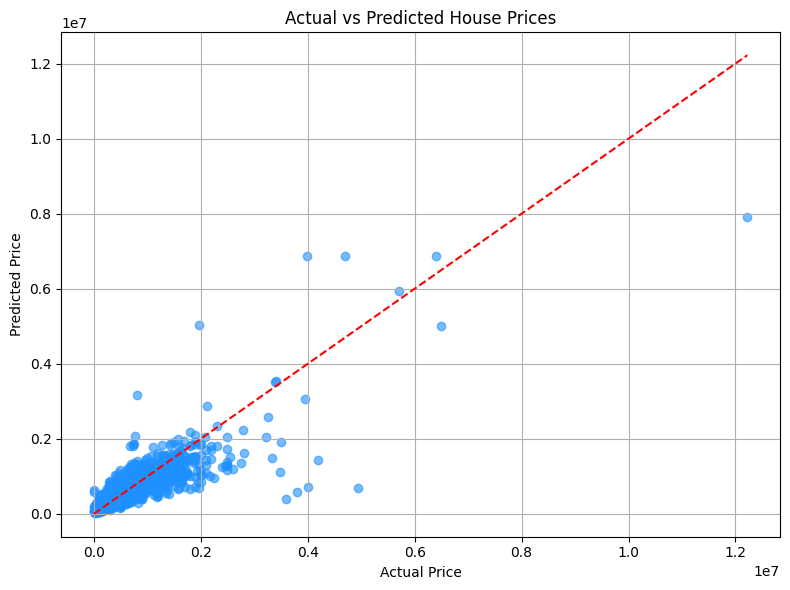

In [68]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test, alpha=0.6, color='dodgerblue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Perfect prediction line
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.tight_layout()
plt.show()

Creating a Neural Network Model

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# Define features and target
X = cleaned_df[['Longitude', 'Latitude', 'Living Space', 'Median Household Income', 'Zip Code Population']]
y = cleaned_df['Price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize features (important for NN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the Keras model
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    verbose=0  # set to 1 if you want to see the training progress
)

# Make predictions
y_pred_train = model.predict(X_train_scaled).flatten()
y_pred_test = model.predict(X_test_scaled).flatten()

# Evaluate
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

# Output
print(f"Train MAPE: {mape_train:.4f} ({mape_train * 100:.2f}%)")
print(f"Test MAPE: {mape_test:.4f} ({mape_test * 100:.2f}%)")
print(f"Training MSE: {train_mse:.2f}")
print(f"Testing MSE: {test_mse:.2f}")


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


951/951 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
238/238 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Train MAPE: 0.4665 (46.65%)
Test MAPE: 0.4906 (49.06%)
Training MSE: 96182198099.89
Testing MSE: 120234484608.71


Epoch 1/200


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


760/760 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 28.8561 - mae: 3.5717 - val_loss: 0.2275 - val_mae: 0.3558 - learning_rate: 0.0010
Epoch 2/200
760/760 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.2230 - mae: 0.3450 - val_loss: 0.1821 - val_mae: 0.3154 - learning_rate: 0.0010
Epoch 3/200
760/760 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.1998 - mae: 0.3253 - val_loss: 0.1819 - val_mae: 0.3162 - learning_rate: 0.0010
Epoch 4/200
760/760 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1960 - mae: 0.3180 - val_loss: 0.1732 - val_mae: 0.3041 - learning_rate: 0.0010
Epoch 5/200
760/760 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1865 - mae: 0.3139 - val_loss: 0.1890 - val_mae: 0.3136 - learning_rate: 0.0010
Epoch 6/200
760/760 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1859 - mae: 0.3159 - val_loss: 0.1838 - val_mae: 0.3136 - learning_rate: 0.0010
Epoch 7/200
760/760 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1932 - mae: 0.3184 - val_loss: 0.2067 - val_mae: 0.3439 - learning_rate: 0.0010
Epoch 8/20

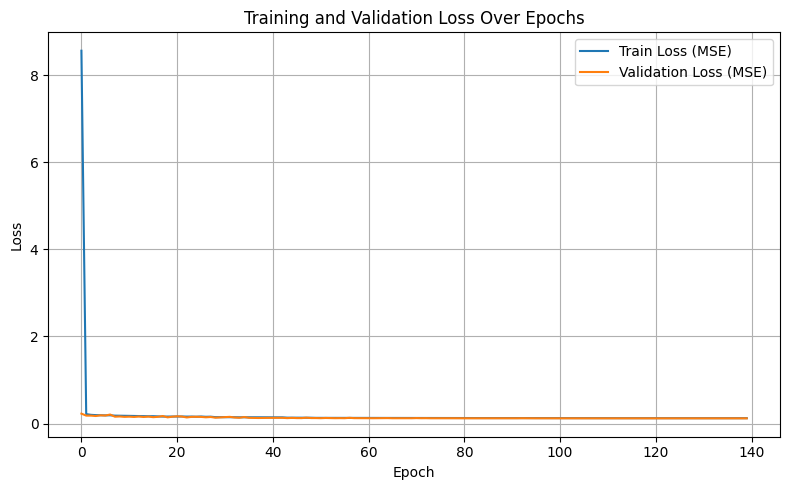

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# ----- Data Preparation -----
# Define features and target
# Assume cleaned_df is your DataFrame and numeric_features are defined elsewhere if needed.
X = cleaned_df[['Longitude', 'Latitude', 'Living Space', 'Median Household Income', 'Zip Code Population']]

# Log-transform the target (use np.log1p so that zero values are handled properly)
y = np.log1p(cleaned_df['Price'])

# Split the data (using a fixed seed for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----- Feature Scaling -----
# Neural networks work best when features are normalized
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ----- Building the Keras Deep Neural Network -----
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)  # One unit because it's a regression task
])

# Compile the model with Adam optimizer and MSE loss
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Define callbacks for early stopping and to reduce learning rate if the model plateaus
callbacks = [
    EarlyStopping(patience=10, restore_best_weights=True),
    ReduceLROnPlateau(patience=5, factor=0.5)
]

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    callbacks=callbacks,
    verbose=1  # Change to 0 to silence output
)

# ----- Making Predictions and Inverting the Log Transform -----
# Predict on training and test sets (predictions are on the log scale)
y_pred_train_log = model.predict(X_train_scaled).flatten()
y_pred_test_log = model.predict(X_test_scaled).flatten()

# Inverse the log transform to get predictions in the original scale
y_train_pred = np.expm1(y_pred_train_log)
y_test_pred = np.expm1(y_pred_test_log)
y_train_actual = np.expm1(y_train)
y_test_actual = np.expm1(y_test)

# ----- Evaluate the Model -----
mape_train = mean_absolute_percentage_error(y_train_actual, y_train_pred)
mape_test = mean_absolute_percentage_error(y_test_actual, y_test_pred)
train_mse = mean_squared_error(y_train_actual, y_train_pred)
test_mse = mean_squared_error(y_test_actual, y_test_pred)

print(f"Train MAPE: {mape_train:.4f} ({mape_train * 100:.2f}%)")
print(f"Test MAPE: {mape_test:.4f} ({mape_test * 100:.2f}%)")
print(f"Training MSE: {train_mse:.2f}")
print(f"Testing MSE: {test_mse:.2f}")

# ----- Visualize Training History -----
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


The neural network model takes a lot of time to utilize, therefore, we use the Manually tuned Hyperparameter XGBoost Model for this study case.

## Conclusion

This model is created to assist real estate developers, sales, buyers and company to know houses price range based on its' location, size and other features shown in this dataset.

The model created to predict the American house price has been established using XGBoost algorithm. While linear and neural network regression can also create a model for this case, this study shows that XGBoost algorithm can create a model with minimal computational time than Neural Network while maintaining a smaller error and applicable for many features computing than linear regression.

While approximately 30% error might still need improvement, I assume that the dataset still lacks on critical features that might increase the accuracy on this model.

I hope that this study can give a baseline on how to create a model in a real world scenario problems, applicable in a data analytics-job demanding problems.